# Star wars survey

While waiting for Star Wars: The Force Awakens to come out, the team at FiveThirtyEight became interested in answering some questions about Star Wars fans. In particular, they wondered: does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch

In [1]:
import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [2]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292719380,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1.0,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
6,3292684787,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6.0,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
7,3292663732,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4.0,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
8,3292654043,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
9,3292640424,Yes,No,NaN,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN,1.0,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific

In [3]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

## Cleaning and Mapping Yes/No Columns

Take a look at the next two columns:

- `Have you seen any of the 6 films in the Star Wars franchise?`
- `Do you consider yourself to be a fan of the Star Wars film franchise?`

Both represent Yes/No questions. They can also be NaN where a respondent chooses not to answer a question. Both columns are currently string types, because the main values they contain are Yes and No. We can make the data a bit easier to analyze later by converting each column to a Boolean with only the values `True`, `False`, and `NaN`.

In [4]:
yes_no_columns = ['Have you seen any of the 6 films in the Star Wars franchise?',
           'Do you consider yourself to be a fan of the Star Wars film franchise?']
yes_no_map = {'Yes': True, 'No': False}

for column in yes_no_columns:
    star_wars[column].map(yes_no_map)
    print(star_wars[column].value_counts(dropna=False))

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64
Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


## Cleaning and Mapping Checkbox Columns

The next six columns represent a single checkbox question. The respondent checked off a series of boxes in response to the question, Which of the following Star Wars films have you seen? Please select all that apply.

The columns for this question are:

- Which of the following Star Wars films have you seen? Please select all that apply. — whether or not the respondent saw Star Wars: Episode I The Phantom Menace.
- Unnamed: 4 — whether or not the respondent saw Star Wars: Episode II Attack of the Clones.
- Unnamed: 5 — whether or not the respondent saw Star Wars: Episode III Revenge of the Sith.
- Unnamed: 6 — whether or not the respondent saw Star Wars: Episode IV A New Hope.
- Unnamed: 7 — whether or not the respondent saw Star Wars: Episode V The Empire Strikes Back.
- Unnamed: 8 — whether or not the respondent saw Star Wars: Episode VI Return of the Jedi.

In [5]:
checkbox_columns = star_wars.columns[3:9]
star_wars[checkbox_columns] = star_wars[checkbox_columns].apply(lambda answer: pd.isna(answer))

star_wars_movies = ['Star Wars: Episode I The Phantom Menace', 'Star Wars: Episode II Attack of the Clones',
                   'Star Wars: Episode III Revenge of the Sith',  'Star Wars: Episode IV A New Hope',
                   'Star Wars: Episode V The Empire Strikes Back', 'Star Wars: Episode VI Return of the Jedi']

In [6]:
map_columns = {column : movie for column, movie in zip(checkbox_columns, star_wars_movies)}
star_wars.rename(columns=map_columns, inplace=True)

In [7]:
for movie in star_wars_movies:
    print(star_wars[movie].value_counts())

False    673
True     513
Name: Star Wars: Episode I The Phantom Menace, dtype: int64
True     615
False    571
Name: Star Wars: Episode II Attack of the Clones, dtype: int64
True     636
False    550
Name: Star Wars: Episode III Revenge of the Sith, dtype: int64
False    607
True     579
Name: Star Wars: Episode IV A New Hope, dtype: int64
False    758
True     428
Name: Star Wars: Episode V The Empire Strikes Back, dtype: int64
False    738
True     448
Name: Star Wars: Episode VI Return of the Jedi, dtype: int64


## Cleaning the Ranking Columns

The next six columns ask the respondent to rank the Star Wars movies in order from least to most favorite. 1 means the film was the most favorite, and 6 means it was the least favorite. Each of the following columns can contain the value 1, 2, 3, 4, 5, 6, or NaN:

- Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film. - How much the respondent liked Star Wars: Episode I The Phantom Menace
- Unnamed: 10 — How much the respondent liked Star Wars: Episode II Attack of the Clones
- Unnamed: 11 — How much the respondent liked Star Wars: Episode III Revenge of the Sith
- Unnamed: 12 — How much the respondent liked Star Wars: Episode IV A New Hope
- Unnamed: 13 — How much the respondent liked Star Wars: Episode V The Empire Strikes Back
- Unnamed: 14 — How much the respondent liked Star Wars: Episode VI Return of the Jedi

In [9]:
ranking_columns = star_wars.columns[9:15]
star_wars[ranking_columns] = star_wars[ranking_columns].astype(float)

In [15]:
rankings = [f'ranking_{i}' for i in range(1,7)]
map_columns = {column:ranking for column, ranking in zip(ranking_columns, rankings)}
star_wars.rename(columns=map_columns, inplace=True)

In [17]:
for ranking in rankings:
    print(star_wars[ranking].value_counts())

4.0    237
6.0    168
3.0    130
1.0    129
5.0    100
2.0     71
Name: ranking_1, dtype: int64
5.0    300
4.0    183
2.0    116
3.0    103
6.0    102
1.0     32
Name: ranking_2, dtype: int64
6.0    217
5.0    203
4.0    182
3.0    150
2.0     47
1.0     36
Name: ranking_3, dtype: int64
1.0    204
6.0    161
2.0    135
4.0    130
3.0    127
5.0     79
Name: ranking_4, dtype: int64
1.0    289
2.0    235
5.0    118
3.0    106
4.0     47
6.0     41
Name: ranking_5, dtype: int64
2.0    232
3.0    220
1.0    146
6.0    145
4.0     57
5.0     36
Name: ranking_6, dtype: int64


## Finding the Highest-Ranked Movie

Now that we've cleaned up the ranking columns, we can find the highest-ranked movie quicker. 

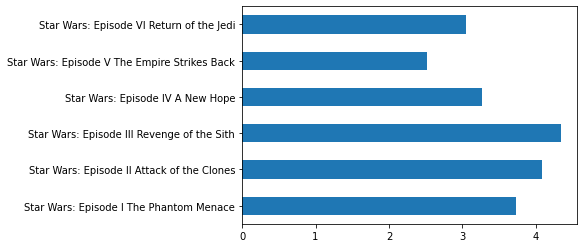

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

ranking_map = {ranking:movie for ranking, movie in zip(rankings, star_wars_movies)}
star_wars[rankings].rename(columns=ranking_map).mean().plot(kind='barh')

plt.show()

We can see that the film with the highest ranking is `Star Wars: Episode V The Empire Strikes Back` and the one with the lowest ranking is `Star Wars: Episode III Revenge of the Sith`.

Remember that a lower ranking is better!

## Finding the Most Viewed Movie

Earlier in this project, we cleaned up the seen columns and converted their values to the Boolean type.

<AxesSubplot:>

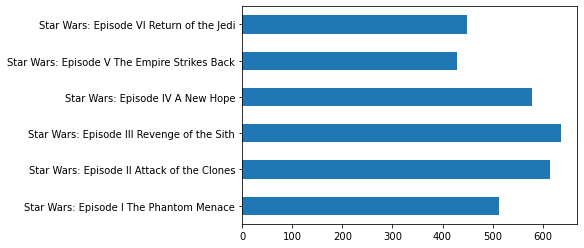

In [24]:
star_wars[star_wars_movies].sum().plot(kind='barh')

We can see the film most viewed is `Star Wars: Episode III Revenge of the Sith` and the one with the lowest ranking is `Star Wars: Episode III Revenge of the Sith`.
